# Automatic sleep staging

In [1]:
import yasa
import joblib
import numpy as np
import pandas as pd

In [3]:
# Load EEG data
f = np.load('data_full_6hrs_100Hz_Cz+Fz+Pz.npz')
data, ch_names = f['data'], f['chan']
sf = 100.
# Keep only Cz
eeg = data[0, :]

# Load hypnogram
hypno_30s = np.loadtxt('data_full_6hrs_100Hz_hypno_30s.txt')

In [6]:
sls = yasa.SleepStaging(eeg, sf, metadata=dict(age=25, male=1))
features = sls.get_features()
features

,age,eeg_10p,eeg_10p_norm,eeg_10p_rollavg_c5min_norm,eeg_90p,eeg_90p_norm,eeg_90p_rollavg_c5min_norm,eeg_absmean,eeg_absmean_norm,eeg_absmean_rollavg_c5min_norm,...,eeg_skew_rollavg_c5min_norm,eeg_std,eeg_std_norm,eeg_std_rollavg_c5min_norm,eeg_theta,eeg_theta_norm,eeg_theta_rollavg_c5min_norm,male,time_hour,time_norm
epoch,,,,,,,,,,,,,,,,,,,,,
0,25,-16.677991,0.142551,0.058635,15.213169,-0.207882,0.008278,10.696355,-0.209635,-0.023217,...,0.203605,14.732076,-0.271893,-0.024122,0.149349,0.277694,0.037496,1,0.000000,0.000000
1,25,-17.962478,0.119320,0.080700,20.234638,-0.117065,-0.028758,12.787350,-0.150713,-0.061838,...,0.240416,18.153675,-0.201440,-0.080327,0.146212,0.259187,0.029856,1,0.008333,0.001391
2,25,-25.656123,-0.019829,0.097676,28.625218,0.034683,-0.054258,18.614599,0.013495,-0.089377,...,0.255838,27.490479,-0.009189,-0.121047,0.071520,-0.181427,0.020966,1,0.016667,0.002782
3,25,-46.693112,-0.400306,0.111242,68.951777,0.764012,-0.076049,44.010756,0.729139,-0.111007,...,0.280375,80.000312,1.072024,-0.151985,0.083194,-0.112560,0.038721,1,0.025000,0.004172
4,25,-15.142699,0.170319,0.127743,15.288986,-0.206510,-0.098459,9.245328,-0.250524,-0.133901,...,0.290730,11.688066,-0.334571,-0.183183,0.102779,0.002970,0.088749,1,0.033333,0.005563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,25,-16.867847,0.139117,0.122823,17.580776,-0.165062,-0.128472,10.803383,-0.206619,-0.170762,...,0.312745,13.962996,-0.287729,-0.258392,0.188640,0.509473,0.308650,1,5.958333,0.994437
716,25,-14.436941,0.183083,0.108428,14.917895,-0.213222,-0.111158,9.209665,-0.251529,-0.154856,...,0.305212,11.912244,-0.329955,-0.239570,0.169117,0.394309,0.293499,1,5.966667,0.995828
717,25,-14.859416,0.175442,0.095871,14.964672,-0.212376,-0.096666,9.208691,-0.251557,-0.140547,...,0.310414,11.815439,-0.331948,-0.220695,0.153187,0.300335,0.298247,1,5.975000,0.997218


<AxesSubplot:xlabel='epoch'>

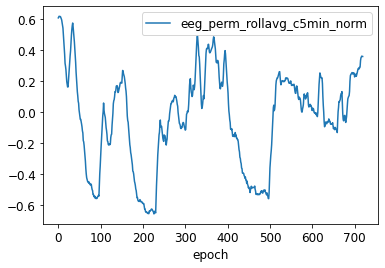

In [10]:
features.plot(y='eeg_perm_rollavg_c5min_norm')

### Predict and validate

In [ ]:
y_true = yasa.hypno_int_to_str(hypno_30s)
y_pred = sls.predict(path_to_model="/Users/raph/GitHub/yasa_classifiers/classifiers/clf_eeg_lgb.joblib")
y_true, y_pred

In [ ]:
from sklearn.metrics import accuracy_score

# Accuracy score
accuracy_score(y_true, y_pred)

In [ ]:
# Predict the probability associated with each sleep stage
sls.predict_proba(path_to_model="/Users/raph/GitHub/yasa_classifiers/classifiers/clf_eeg_lgb.joblib")